In [1]:
# Define get_transforms Function

# Import necessary libraries
from torchvision import transforms

# Function to define transformations for validation dataset
def get_transforms():
    data_transforms = {
        'val': transforms.Compose([
            transforms.Resize([224, 224]),  # Resize image to 224x224 pixels
            transforms.ToTensor(),  # Convert image to PyTorch tensor
        ]),
    }
    return data_transforms  # Return dictionary of transformations


In [2]:
# Define MyResnet Class

# Import necessary libraries
from torchvision import models
import torch

# Define custom ResNet model class
class MyResnet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Load pre-trained ResNet18 model from torchvision and replace final fully connected layer
        self.res = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        self.res.fc = torch.nn.Sequential(
            torch.nn.Linear(self.res.fc.in_features, 3),  # Replace FC layer with output size 3
            torch.nn.ReLU()  # Apply ReLU activation
        )

    def forward(self, x):
        out = self.res(x)  # Forward pass through the modified ResNet model
        return out  # Return output


Predicted Labels: circle = 1.0, rectangle = 1.0, triangle = 1.0


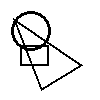

In [3]:
# Model Evaluation

# Import necessary libraries
import torch
from PIL import Image

# Determine device (GPU if available, otherwise CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the path to the image
image_name = "result/random_shapes_2.png"

# Instantiate the custom ResNet model
model = MyResnet()

# Load the best trained model weights
model.load_state_dict(torch.load('weights/multiclass_res_best_model.pt')['model_state_dict'])

# Move the model to the appropriate device (CPU or GPU)
model.to(device)

# Set the model to evaluation mode
model.eval()

# Open and load the image
image = Image.open(image_name)

# Apply transformations for validation (resize and convert to tensor)
transform_val = get_transforms()['val']
image_transformed = transform_val(image).unsqueeze(0).to(device)

# Perform forward pass through the model and round the output to get predicted labels
out = torch.round(model(image_transformed) * 3)
out = out[0].tolist()

# Print predicted labels for each class
print(f'Predicted Labels: circle = {out[0]}, rectangle = {out[1]}, triangle = {out[2]}')

# Display the original image
image
